In [5]:
import numpy as np
from connectomics.config import get_cfg_defaults
from connectomics.data.dataset.build import _get_input
from connectomics.data.utils import edt_instance
import os

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def show(image, cmap='viridis', title='Test Title', interpolation=None):  
    num_imgs = image.shape[0]
    fig = plt.figure(figsize=(20., 3.))
    fig.suptitle(title, fontsize=15)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, num_imgs),  # creates 2x2 grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
    image_list = np.split(image, num_imgs, 0)
    for ax, im in zip(grid, [np.squeeze(x) for x in image_list]):
        # Iterating over the grid returns the Axes.
        ax.imshow(im, cmap=cmap, interpolation=interpolation)
        ax.axis('off')

    plt.show()

In [30]:
# Load configs and dataset
cfg_filename = 'configs/SNEMI/SNEMI-Base.yaml' # You should be in the pytorch_connectomics directory
cfg = get_cfg_defaults()
cfg.merge_from_file(cfg_filename)
vol, labels, _ = _get_input(cfg, 'train')
labels = np.array(labels[0])
vol = np.array(vol[0])

None 1 ['train-input.tif']
volume shape (original): (100, 1024, 1024)
volume shape (after scaling and padding): (108, 1152, 1152)
label shape (after scaling and padding): (108, 1152, 1152)


In [27]:
# Slice taken from the centre of the image since the edges have reflective padding
subvolume      = labels[58:65, 500:757, 500:757]
subvolume_em   = vol[58:65, 500:757, 500:757]

In [28]:
edt_continuous  = edt_instance(subvolume, mode = '3d', quantize = False)
edt_quantized   = edt_instance(subvolume, mode = '3d', quantize = True)

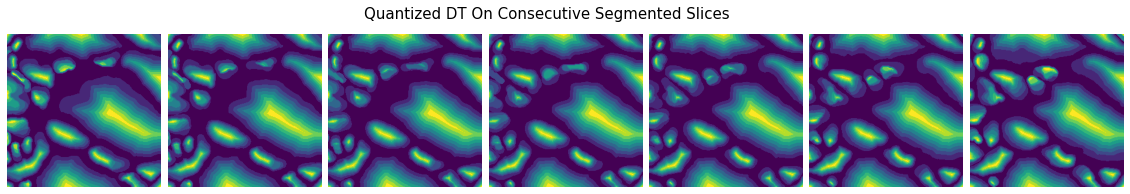

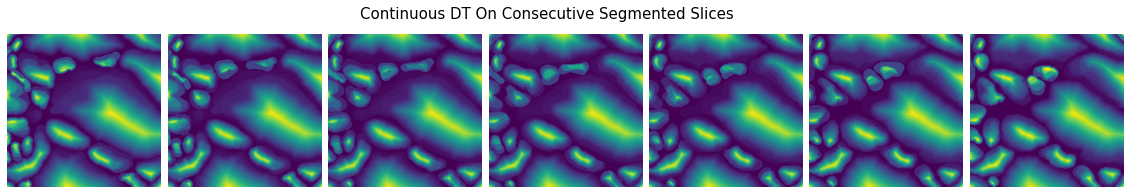

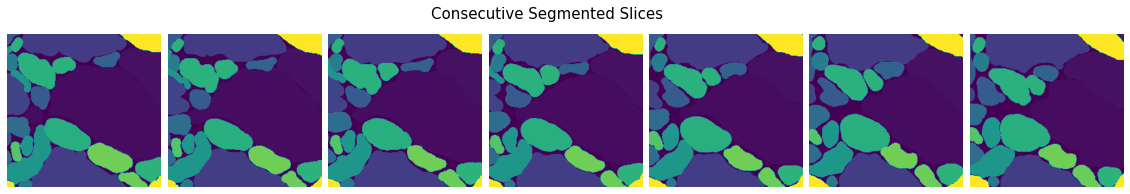

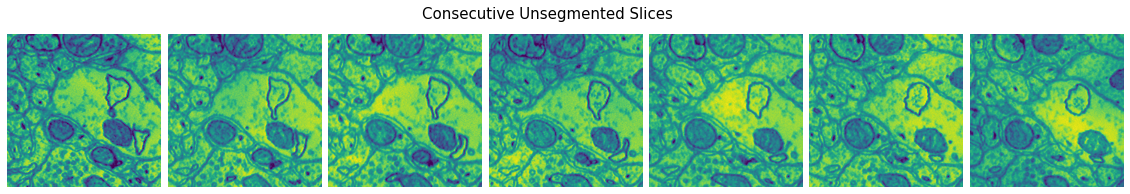

In [29]:
show(edt_quantized, title = 'Quantized DT On Consecutive Segmented Slices')
show(edt_continuous, title = 'Continuous DT On Consecutive Segmented Slices')
show(subvolume, title = 'Consecutive Segmented Slices')
show(subvolume_em, title = 'Consecutive Unsegmented Slices')